# Airbnb New User Bookings  - Kaggle Project  

## Machine Learning Algorithm Training and Prediction 
## Part 2 of 2

The prepared datasets in part 1 are loaded into this notebook. This notebook contains the theory and implementation of the Machine Learning Algorithms and metrics employed for this particular dataset. After a suitable an ML algorithm is found, GridSearchCV will be used to refine the model and final submission dataset in .csv format will be created.

** First lets start with importing the necessary libraries and load the datasets in** 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from time import time
from sklearn import metrics
import datetime

# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

### Load the datasets 

3 Datasets are loaded in , namely  

1. **testing_data_merged:**  
    This dataset is the merged testing_data and session_data
2. **training_data_merged:**  
    This dataset is the merged training_data and session_data (**outer join**) - Contains all the training_data users i.e users which do not have corresponding session_data is also included.
3. **training_data_merged_inner:**  
    This dataset is the merged training_data and session_data (**inner join**) - Contains only ~40% of the total training_data users, i.e user which have corresponding session_data

In [4]:
# Loading the datasets

testing_data_merged = pd.read_csv('testing_data_merged.csv')
training_data_merged = pd.read_csv('training_data_merged.csv')
training_data_merged_inner = pd.read_csv('training_data_merged_inner.csv')

The column that is to be predicted i.e country_destination has to be dropped into a different variable. The "id" column in both the training datasets have to be dropped. 

The user id in testing set is made into a list to be used at the end for creating the .csv for submission to kaggle for evaluation. 


In [5]:
#  To be predicted Label being copied to a variable
destination_merged = training_data_merged["country_destination"]
destination_merged_inner = training_data_merged_inner["country_destination"]

# Dropping id and country destination from training
training_data_merged = training_data_merged.drop(['id','country_destination'],axis=1)
training_data_merged_inner = training_data_merged_inner.drop(['id','country_destination'],axis=1)

# Modification is testing data
ids_list = testing_data_merged.id
testing_data_merged.drop("id",axis=1,inplace=True)

### Verifying all datasets

In [6]:
testing_data_merged.columns

Index([u'age', u'signup_flow', u'dac_year', u'dac_month', u'dac_day',
       u'tfa_year', u'tfa_month', u'tfa_day', u'gender_FEMALE', u'gender_MALE',
       ...
       u'action_detail_view_search_results',
       u'action_detail_view_security_checks',
       u'action_detail_view_user_real_names', u'action_detail_wishlist',
       u'action_detail_wishlist_content_update',
       u'action_detail_wishlist_note', u'action_detail_your_listings',
       u'action_detail_your_reservations', u'action_detail_your_trips',
       u'secs_elapsed'],
      dtype='object', length=635)

In [7]:
testing_data_merged

,age,signup_flow,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,35.0,0,2014,7,1,2014,7,1,1,0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119187.0
1,-1.0,0,2014,7,1,2014,7,1,0,0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250119.0
2,-1.0,0,2014,7,1,2014,7,1,0,0,...,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,975575.0
3,-1.0,0,2014,7,1,2014,7,1,0,0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,123001.0
4,-1.0,0,2014,7,1,2014,7,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,454023.0
5,28.0,0,2014,7,1,2014,7,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60924.0
6,48.0,25,2014,7,1,2014,7,1,0,1,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,640922.0
7,-1.0,0,2014,7,1,2014,7,1,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,391231.0
8,-1.0,0,2014,7,1,2014,7,1,0,0,...,84.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,8481847.0
9,-1.0,0,2014,7,1,2014,7,1,0,0,...,12.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,5084265.0


In [8]:
training_data_merged

,age,signup_flow,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,-1.0,0,2010,6,28,2009,3,19,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,38.0,0,2011,5,25,2009,5,23,0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,56.0,3,2010,9,28,2009,6,9,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,42.0,0,2011,12,5,2009,10,31,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,41.0,0,2010,9,14,2009,12,8,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,0,2010,1,1,2010,1,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,46.0,0,2010,1,2,2010,1,2,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,47.0,0,2010,1,3,2010,1,3,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,50.0,0,2010,1,4,2010,1,4,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,46.0,0,2010,1,4,2010,1,4,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
training_data_merged_inner

,age,signup_flow,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,62.0,0,2014,1,1,2014,1,1,0,1,...,23.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,3427529.0
1,-1.0,0,2014,1,1,2014,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,207842.0
2,-1.0,0,2014,1,1,2014,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1135444.0
3,-1.0,0,2014,1,1,2014,1,1,0,0,...,32.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,3755100.0
4,-1.0,25,2014,1,1,2014,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2555.0
5,-1.0,0,2014,1,1,2014,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1380288.0
6,32.0,0,2014,1,1,2014,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49673.0
7,-1.0,0,2014,1,1,2014,1,1,0,0,...,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,605413.0
8,19.0,0,2014,1,1,2014,1,1,0,0,...,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1284401.0
9,25.0,0,2014,1,1,2014,1,1,0,1,...,39.0,0.0,0.0,1.0,43.0,0.0,0.0,0.0,1.0,2868205.0


In [10]:
destination_merged

0           NDF
1           NDF
2            US
3         other
4            US
5            US
6            US
7            US
8            US
9            US
10           US
11          NDF
12           FR
13          NDF
14          NDF
15           CA
16          NDF
17           US
18          NDF
19           FR
20           US
21           US
22           US
23          NDF
24          NDF
25           FR
26          NDF
27           US
28           FR
29           US
          ...  
213421      NDF
213422      NDF
213423      NDF
213424      NDF
213425      NDF
213426      NDF
213427      NDF
213428      NDF
213429      NDF
213430      NDF
213431      NDF
213432      NDF
213433      NDF
213434      NDF
213435      NDF
213436      NDF
213437      NDF
213438      NDF
213439       US
213440      NDF
213441       ES
213442      NDF
213443       US
213444      NDF
213445       US
213446      NDF
213447      NDF
213448      NDF
213449      NDF
213450      NDF
Name: country_destinatio

In [11]:
ids_list

0        5uwns89zht
1        jtl0dijy2j
2        xx0ulgorjt
3        6c6puo6ix0
4        czqhjk3yfe
5        szx28ujmhf
6        guenkfjcbq
7        tkpq0mlugk
8        3xtgd5p9dn
9        md9aj22l5a
10       gg3eswjxdf
11       fyomoivygn
12       iq4kkd5oan
13       6k1xls6x5j
14       jodmb2ok1f
15       eq6fy0m4vc
16       yq4i7nfh6l
17       q5pibqdous
18       i0sc6d3j8s
19       br5mcrsqzn
20       rddbczuxx1
21       glck7hlmzz
22       sxpkaxep8n
23       sr4ntmalz2
24       f6wueq1ccn
25       ovc6nwn6mj
26       n10skstp90
27       5jrbdigmv4
28       d45nngmojp
29       y0frb6t1kq
            ...    
62066    bsv2ev628t
62067    06echc56pl
62068    niqgaye2ov
62069    61iwzuhw6e
62070    gks02el96u
62071    v4r1161l0r
62072    p1clbqd0o6
62073    ozb2z0km6l
62074    w3e3sp6i70
62075    q5bxbq0asg
62076    1xa5t3t0la
62077    zuvz7gfpjz
62078    gpusl6ppgf
62079    gpijioh4eh
62080    3ptlvdxss9
62081    f9a1ncjnrg
62082    kofaz2kh70
62083    6xrmom7hjo
62084    cg9wqgnad2


###### Before we train using the data, it is essential to remove the columns which are  mutually exclusive to each dataset.

As we saw earlier that when we one hot encoded the training data and the test data. We received different numbers of columns in both.If this is not handled and training is done on the current training set. At the time of prediction, an error will be thrown. Therefore, let's explore which columns are missing and how to handle that. 

In [12]:
print "Number of columns in testing_data_merged:", len(testing_data_merged.columns) 
print "Number of columns in training_data_merged:", len(training_data_merged.columns) 
print "Difference in the number of columns:", len(training_data_merged.columns) - len(testing_data_merged.columns)

Number of columns in testing_data_merged: 635
Number of columns in training_data_merged: 659
Difference in the number of columns: 24


In [13]:
test_columns = testing_data_merged.columns
train_columns = training_data_merged.columns

In [14]:
# Printing the features(columns) that are exclusive to each of the testing and training set.

x = [i for i in test_columns if i not in train_columns]
print "columns not in traning data: \n" ,x
y = [i for i in train_columns if i not in test_columns]
print ""
print "columns not in test data: \n" ,y

columns not in traning data: 
['signup_method_weibo', 'first_browser_IBrowse', 'first_browser_Nintendo Browser', 'first_browser_UC Browser']

columns not in test data: 
['language_hr', 'language_is', 'affiliate_channel_api', 'affiliate_provider_wayn', 'first_browser_Arora', 'first_browser_Avant Browser', 'first_browser_Camino', 'first_browser_Comodo Dragon', 'first_browser_Conkeror', 'first_browser_CoolNovo', 'first_browser_Crazy Browser', 'first_browser_Epic', 'first_browser_Flock', 'first_browser_Google Earth', 'first_browser_Googlebot', 'first_browser_IceDragon', 'first_browser_Kindle Browser', 'first_browser_Mozilla', 'first_browser_NetNewsWire', 'first_browser_OmniWeb', 'first_browser_Outlook 2007', 'first_browser_PS Vita browser', 'first_browser_Palm Pre web browser', 'first_browser_RockMelt', 'first_browser_SlimBrowser', 'first_browser_Stainless', 'first_browser_TenFourFox', 'first_browser_TheWorld Browser']


In [15]:
# Dropping the features(columns) that are exclusive to each of the testing and training set.

for i in x:
    testing_data_merged.drop(i,axis=1,inplace=True)
for i in y:
    training_data_merged.drop(i,axis=1,inplace=True)
for i in y:
    training_data_merged_inner.drop(i,axis=1,inplace=True)

In [16]:
print "Number of columns in testing_data_merged:", len(testing_data_merged.columns) 
print "Number of columns in training_data_merged:", len(training_data_merged.columns) 
print "Number of columns in training_data_merged_inner:", len(training_data_merged_inner.columns) 
print "Difference in the number of columns:", len(training_data_merged.columns) - len(testing_data_merged.columns)

Number of columns in testing_data_merged: 631
Number of columns in training_data_merged: 631
Number of columns in training_data_merged_inner: 631
Difference in the number of columns: 0


#### The datsets are ready, the training nor the testing set has any columns that are exclusive to itself. The datasets are ready to be fed into the ML Model.

# ML Model Training and Predictions

The objective of this machine learning model is to predict the country_destination that a new user will book based on the user data and demographics. 

Therefore this is a multi-classification problem.

Some of the algorithms that we can use to employ this are:  

1. Support Vector Machines (SVM)
2. Logistic Regression
3. Random Forest 
4. XGBOOST and much more

For this problem, I will try out SVM, RandomForest, Logistic regression and XGBoost and see which one will give a better result. Based on that we can move forward and tune the appropriate algorithm. 

2 different datasets for training data have been loaded. One which contains a left join between the given training set and session data, the other which has data from an inner join between the session data and training data.

Usually, it's true that more data will result in better results. But I would like to train the algorithm on both these datasets to predict on the test data, as the test data only has 0.68% of its rows without session data. Therefore it might perform better.

Lets split the training data into testing and training set for Cross Validation.  
The prediction on the given global test data will be done after we have a suitable ML model.

In [38]:
# Veryfying the number of rows in all the dataframes that will be trained and tested

print "Number of rows in training_data_merged:", len(training_data_merged)
print "Number of rows in destination_merged:", len(destination_merged)
print "Number of rows in training_data_merged_inner:", len(training_data_merged_inner)
print "Number of rows in destination_merged_inner:", len(destination_merged_inner)

Number of rows in training_data_merged: 213451
Number of rows in destination_merged: 213451
Number of rows in training_data_merged_inner: 73815
Number of rows in destination_merged_inner: 73815


## Splitting the training datasets into training and testing for CV and Evaluation.

As this is a Kaggle Dataset, we have the liberty to train on the whole training data and then leave the testing and metrics to Kaggle. 
But,  
1. Kaggle only provides 5 submissions a day. 
2. On top of that If we can test on our machine with the metrics of our choosing we can check if we are moving in the right direction.

We will be using StratifiedShuffleSplit for splitting data. Even though this is a dataset that contains 213452 rows, Many of the destination labels are "NDF" and there is a possibility that an unbalanced dataset might fall into the training data. It is always better to go with StratifiedShuffleSplit rather than train_test_split. 

for more information regarding the benefits of StratifiedShuffleSplit.  
Reference: http://stats.stackexchange.com/questions/117643/why-use-stratified-cross-validation-why-does-this-not-damage-variance-related-b

In [18]:
# Splitting training datasets into training and testing for CV.

import sklearn as sk

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit()

for train_index, test_index in sss.split(training_data_merged,destination_merged):
    X_train, X_test = training_data_merged.loc[train_index], training_data_merged.loc[test_index]
    y_train, y_test = destination_merged.loc[train_index], destination_merged.loc[test_index]
    
for train_index, test_index in sss.split(training_data_merged_inner,destination_merged_inner):
    X_train_inner, X_test_inner = training_data_merged.loc[train_index], training_data_merged.loc[test_index]
    y_train_inner, y_test_inner = destination_merged.loc[train_index], destination_merged.loc[test_index]

# Starting ML Training Process


As I said earlier, I will be employing different machine learning algorithms for the job. These classification algorithms are explained below briefly. 

1. **Support Vector Machines (SVM)**  
    This is a good classification algorithm for high dimensional spaces. it uses a subset of training points in the decision function (called support vectors), so it is also memory efficient. It plots the X, Y values on the graph and then tries to find a hyperplane that separates the classes. If a hyperplane is not found, kernel function or kernel trick is implemented and classification is made. One of the drawbacks is that if there are a higher number of features with respect to a number of samples, It is likely to give poor results. They also do not provide direct probability estimates which might be an issue for this problem as we are expected to make a maximum of top 5 possible predictions for every given user_id.  

2. **Logistic Regression**  
    Multinomial Logistic Regression is based on plotting your independent variable X on the X-axis and then use a  logit function or a progit function and cost function to classify in which class it will fall based on other features. Logistic regression has the ability to predict probabilities, therefore, it will be useful for us.  
    Reference :https://en.wikipedia.org/wiki/Multinomial_logistic_regression  
    
3. **Random Forest**   
    A random forest is a collection of random decision trees. In which at each node you will randomly draw a subset of features and the decision tree will predict the classification. You do the same with several trees and you bag them. This ensemble method will reduce overfitting and provide good classification. This also contributes to a good compromise between bias and variance.  

4. **XGBOOST**  
    XGBoost is short for “Extreme Gradient Boosting”. This is based on  Gradient boosted trees. Boosted trees are basically an ensemble of decision trees which are fit sequentially so that each new tree makes up for the errors of the previously existing set of trees. The model is "boosted" by focusing new additions on correcting the residual errors of the last version of the model. Then you take an approximate step in the gradient direction by training a model to predict the gradient given the data. This algorithm is very popular for high accuracy and is quite common among Kaggle Competitions. 
    Reference:  
    http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf  
    http://xgboost.readthedocs.io/en/latest/model.html

### Working with training_data_merged dataset first.

After stratified shuffle split they are X_train, X_test, y_train and y_test.

Using the same function groups from supervised learning project with some modifications to test out the selected different algorithms.

In [19]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, average='weighted')


def train_predict(clf, X_train, X_test, y_train, y_test):
    ''' Train and predict using a classifer based on F1 score and Accuracy. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 SCORE FOR TEST SET: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Testing RandomForestClassifier, SVC and LogisticRegression using f1_score as the evaluation metric.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics


clf_A = RandomForestClassifier(random_state = 42)
#clf_B = SVC(random_state = 42)
clf_C = LogisticRegression(random_state = 42)

classifier_list = [clf_A, clf_C]
    
for clf in classifier_list:
    print "\n**----------------------------New Classifier--------------------------**\n"
    train_predict(clf, X_train, X_test, y_train, y_test)
    print "------------------------------------------------------------------------"


**----------------------------New Classifier--------------------------**

Training a RandomForestClassifier using a training set size of 192105. . .
Trained model in 30.9365 seconds
Made predictions in 4.1802 seconds.
F1 score for training set: 0.9515.
Made predictions in 0.4876 seconds.
F1 SCORE FOR TEST SET: 0.5581.
------------------------------------------------------------------------

**----------------------------New Classifier--------------------------**

Training a LogisticRegression using a training set size of 192105. . .
Trained model in 266.3050 seconds
Made predictions in 2.2150 seconds.


/Users/mohammedshinoy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 score for training set: 0.4758.
Made predictions in 0.2578 seconds.
F1 SCORE FOR TEST SET: 0.4771.
------------------------------------------------------------------------


SVC does not terminate training within any specified amount of time. Whereas RandomForestClassifier finishes one fit in 31 sec. Interrupting the kernel to run just RandomForestClassifier and LogisticRegression. SVC is not a viable solution for this problem because it does not terminate. 

On further exploration it is noted in sklearn that the SVM.SVC implementation is based on libsvm. "The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to a dataset with more than a couple of 10000 samples."  
Reference : http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Therefore it makes sense that it is taking very long. This is a known issue for large datasets. 

** RESULTS FROM THE ABOVE TRIAL**

The RandomForestClassifier trained the model in 30 secs and has an F1 SCORE(TEST SET) of 0.5581.  
The LogisticRegression trained the model in 266 secs and has an F1 SCORE(TEST SET) of 0.4771.  

Out of these two, the RandomForestClassifier seems to be the better one in terms of speed as well as accuracy.  
SVM seems to be a bad choice for a problem which has a sample size of more than 10000 rows.

XGBoost is a based on a Gradient Boosting Algorithm and is well known among Kagglers as the trained model usually works out to have a great accuracy when compared to the rest. It also provides a plethora of tuning factors which makes it a powerful ML  algorithm.  
Reference : http://xgboost.readthedocs.io/en/latest/

In [53]:
# XGBOOST classifier import statements 

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import datetime
from sklearn.externals import joblib


## fit_and_results function which will take a classifier and fit 

It prints the time taken and score. It also returns the trained classifer.

In [31]:
def fit_and_results(xgb,X_train,y_train,X_test,y_test):
    '''Fit the XGBoost model and print the results, return the classifer'''
    print " Fitting the model at ",str(datetime.datetime.now())
    start_time = time()

    xgb.fit(X_train,y_train)

    print("--- %s minutes ---" % ((time() - start_time)/60))
    print " Fitting Completed"

    #Predict training set:
    xgtrain_predictions = xgb.predict(X_train)
    xgtest_predictions = xgb.predict(X_test)

    #Print model report:
    print "\nModel Report"
    print "Accuracy (Train) : %.4g" % metrics.accuracy_score(y_train, xgtrain_predictions)
    print "Accuracy test (Test) : %.4g" % metrics.accuracy_score(y_test, xgtest_predictions)
    print "F1 Score (Test): %f" % metrics.f1_score(y_test, xgtest_predictions,average="weighted")
    
    return xgb
    

## Initial XGBClassifier which will train within minutes.

**Not the default implementation from sklearn, this has been simplified for faster computation**

In [32]:
# Initial XGBClassifier
xgb1 = XGBClassifier(
         learning_rate = 0.1,
         n_estimators=2,
         max_depth=2,
         min_child_weight=3,
         gamma=0,
         subsample=0.8,
         colsample_bytree=0.8,
         objective= 'multi:softprob',
         nthread=-1,
         scale_pos_weight=1,
         seed=27)

xgb1_model = fit_and_results(xgb1,X_train,y_train,X_test,y_test)


 Fitting the model at  2017-02-09 15:23:14.369216
--- 2.54654765129 minutes ---
 Fitting Completed

Model Report
Accuracy (Train) : 0.6337
Accuracy test (Test) : 0.6336
F1 Score (Test): 0.589793


/Users/mohammedshinoy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The above xgb1_model is a basic model. We haven't tuned any parameters, moreover the parameters that were used are not even default. It was just used to train as fast as possible. 

** Note that the accuracy of this model is far better than the ones that we had considered earlier.**  
There is an increase of about 0.4 in f1_score.  
0.589793 for XGB vs 0.5581 for RandomForestClassifier.  
Though the random forest was faster in execution , The accuracy makes a major difference here, as every decimal counts in Kaggle Competitions.

Therefore let's select XGBClassifier as the ML Algorithm for this scenario and try to tune it.

The n_estimators in XGBoost is usually set at a higher value. This is found by GridSearchSV. Higher values of n_estimator take more time to train. Due to limitations in computing power. I am setting a high value in the range of 100+ which is set to provide good accuracy.

Setting n_estimators to 150.

In [33]:
# Second XGBClassifier

xgb2 = XGBClassifier(
         learning_rate =0.1,
         n_estimators=150,
         max_depth=5,
         min_child_weight=3,
         gamma=0,
         subsample=0.8,
         colsample_bytree=0.8,
         objective= 'multi:softprob',
         nthread=-1,
         scale_pos_weight=1,
         seed=27)

xgb2_model = fit_and_results(xgb2,X_train,y_train,X_test,y_test)


 Fitting the model at  2017-02-09 15:26:18.573129
--- 182.497275682 minutes ---
 Fitting Completed

Model Report
Accuracy (Train) : 0.6578
Accuracy test (Test) : 0.6522
F1 Score (Test): 0.605005


The training time for the model increased drastically. This will be a problem for tuning as GridSearchCV will be affected greatly due to time taken for computation. There is a considerable increase in f1_score in this model. Let us see if we can improve the score a bit more , then we can create the .csv file for submission and try it out. 

In [50]:
# Saving the trained model to file so that trained model is not lost in case the notebook stops responding.

joblib.dump(xgb2_model, 'xgb2_model.pkl') 

['xgb2_model.pkl']

In [ ]:
# In order to load uncomment the next line and run

# clf = joblib.load('xgb2_model.pkl')

# Testing the same parameters on the inner dataset

As we had StratifiedShuffleSplit two training datasets, Let's try it on the smaller dataset which was made by inner join between session_data and training_data.

In [34]:
# Inner Join Dataset
xgb2_inner = XGBClassifier(
         learning_rate =0.1,
         n_estimators=150,
         max_depth=5,
         min_child_weight=3,
         gamma=0,
         subsample=0.8,
         colsample_bytree=0.8,
         objective= 'multi:softprob',
         nthread=-1,
         scale_pos_weight=1,
         seed=27)

xgb2_inner_model = fit_and_results(xgb2,X_train_inner,y_train_inner,X_test_inner,y_test_inner)

 Fitting the model at  2017-02-09 18:46:07.141532
--- 62.1681851466 minutes ---
 Fitting Completed

Model Report
Accuracy (Train) : 0.6067
Accuracy test (Test) : 0.5973
F1 Score (Test): 0.541131


The f1_score drops significantly. This suggests that the model is performing quite bad. Therefore more data is better in this case. 

In [54]:
# Saving the trained model to file so that trained model is not lost in case the notebook stops responding.

joblib.dump(xgb2_inner_model, 'xgb2_inner_model.pkl') 

['xgb2_inner_model.pkl']

In [ ]:
# In order to load uncomment the next line and run

# clf = joblib.load('xgb2_inner_model.pkl')

# Function for GridSearchCV

It is always better to modularise the program so that duplicate code is not written. 

In [35]:
def trainer(xgb, parameters,X_train,y_train):
    '''Pass the classifier and parameters to this function it will return the trained classifier and the time taken'''
    from sklearn.metrics import make_scorer,f1_score

    f1_scorer = make_scorer(f1_score,average="weighted")
    clf = GridSearchCV(xgb,parameters,scoring=f1_scorer,verbose=3,cv=3)
    
    print " Fitting/Training the model at ",str(datetime.datetime.now())
    start_time = time()
    clf= clf.fit(X_train,y_train)
    training_time = (time() - start_time)/60
    print("--- %s minutes ---" % (training_time))
    print " Fitting Completed"
    
    return clf, training_time



#  GridSearchCV for max_depth

In [ ]:
# specify parameters via map
from sklearn.metrics import make_scorer,f1_score

# FIRST TRIAL GRIDSEARCH

#parameters = {'max_depth':[5,7,10], 'min_child_weight': [1, 3, 5]}
parameters1 = {'max_depth':[5,7,10]}


xgb3 = XGBClassifier(
         learning_rate =0.1,
         n_estimators=150,
         max_depth=5,
         min_child_weight=3,
         gamma=0,
         subsample=0.8,
         colsample_bytree=0.8,
         objective= 'multi:softprob',
         nthread=4,
         scale_pos_weight=1,
         seed=27)

xgb3_model, training_time_1 = trainer(xgb3, parameters1, X_train, y_train)

print "The Best Parameters are"
print xgb3_model.best_params_
print " "


#Predict on testing data:
predictions = xgb3_model.predict(X_test)#[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_test,predictions)
print "F1 Score (Train): %f" % metrics.f1_score(y_test,predictions,average="weighted")

print " Printing the cv_results_ Dataframe"
xgb3_model_results_dataframe = pd.DataFrame(xgb3_model.cv_results_)
xgb3_model_results_dataframe

 Fitting / Training the model 
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_depth=5 .....................................................
[CV] ............................ max_depth=5, score=0.602711 -  14.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 126.9min remaining:    0.0s


[CV] max_depth=5 .....................................................
[CV] ............................ max_depth=5, score=0.603535 -  16.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 254.9min remaining:    0.0s


[CV] max_depth=5 .....................................................
[CV] ............................ max_depth=5, score=0.601635 -  17.9s
[CV] max_depth=7 .....................................................
[CV] ............................ max_depth=7, score=0.603667 -  20.8s
[CV] max_depth=7 .....................................................
[CV] ............................ max_depth=7, score=0.604673 -  20.0s
[CV] max_depth=7 .....................................................
[CV] ............................ max_depth=7, score=0.602632 -  19.9s
[CV] max_depth=10 ....................................................
[CV] ........................... max_depth=10, score=0.603349 -  41.2s
[CV] max_depth=10 ....................................................
[CV] ........................... max_depth=10, score=0.603117 -  35.7s
[CV] max_depth=10 ....................................................
[CV] ........................... max_depth=10, score=0.603097 -  36.1s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 1515.0min finished


KeyboardInterrupt: 

**The best max_depth value seems to be 10. Lets use that to train a classifier as the earlier gridsearch did not complete due to some error.**

# Final Model as inferred from the GridSearchCV

Training on all datapoints in the training data. Not performing evaluation on the train set.

In [37]:
xgb_final = XGBClassifier(
         learning_rate =0.1,
         n_estimators=150,
         max_depth=10,
         min_child_weight=3,
         gamma=0,
         subsample=0.8,
         colsample_bytree=0.8,
         objective= 'multi:softprob',
         nthread=4,
         scale_pos_weight=1,
         seed=27)

print " Fitting the model at ",str(datetime.datetime.now())
start_time = time()

xgb_final_model = xgb_final.fit(training_data_merged, destination_merged)

print("--- %s minutes ---" % ((time() - start_time)/60))
print "Fitting Completed"

 Fitting the model at  2017-02-09 20:36:10.410628
--- 363.55427415 minutes ---
Fitting Completed


This model took 363 minutes to train. Let's hope that we get a really good score with this model.

In [52]:
# Saving the trained model to file so that trained model is not lost in case the notebook stops responding.

joblib.dump(xgb_final_model, 'xgb_final_model.pkl') 

['xgb_final_model.pkl']

In [ ]:
# In order to load uncomment the next line and run

# clf = joblib.load('xgb_final_model.pkl')

# Predicting on the test set and create submission files

In [181]:
# Checking testing_data_merged
testing_data_merged

,age,signup_flow,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,secs_elapsed
0,35.0,0,2014,7,1,2014,7,1,1,0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119187.0
1,-1.0,0,2014,7,1,2014,7,1,0,0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250119.0
2,-1.0,0,2014,7,1,2014,7,1,0,0,...,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,975575.0
3,-1.0,0,2014,7,1,2014,7,1,0,0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,123001.0
4,-1.0,0,2014,7,1,2014,7,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,454023.0
5,28.0,0,2014,7,1,2014,7,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60924.0
6,48.0,25,2014,7,1,2014,7,1,0,1,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,640922.0
7,-1.0,0,2014,7,1,2014,7,1,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,391231.0
8,-1.0,0,2014,7,1,2014,7,1,0,0,...,84.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,8481847.0
9,-1.0,0,2014,7,1,2014,7,1,0,0,...,12.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,5084265.0


In [183]:
# Checking Ids List
ids_list

0        5uwns89zht
1        jtl0dijy2j
2        xx0ulgorjt
3        6c6puo6ix0
4        czqhjk3yfe
5        szx28ujmhf
6        guenkfjcbq
7        tkpq0mlugk
8        3xtgd5p9dn
9        md9aj22l5a
10       gg3eswjxdf
11       fyomoivygn
12       iq4kkd5oan
13       6k1xls6x5j
14       jodmb2ok1f
15       eq6fy0m4vc
16       yq4i7nfh6l
17       q5pibqdous
18       i0sc6d3j8s
19       br5mcrsqzn
20       rddbczuxx1
21       glck7hlmzz
22       sxpkaxep8n
23       sr4ntmalz2
24       f6wueq1ccn
25       ovc6nwn6mj
26       n10skstp90
27       5jrbdigmv4
28       d45nngmojp
29       y0frb6t1kq
            ...    
62066    bsv2ev628t
62067    06echc56pl
62068    niqgaye2ov
62069    61iwzuhw6e
62070    gks02el96u
62071    v4r1161l0r
62072    p1clbqd0o6
62073    ozb2z0km6l
62074    w3e3sp6i70
62075    q5bxbq0asg
62076    1xa5t3t0la
62077    zuvz7gfpjz
62078    gpusl6ppgf
62079    gpijioh4eh
62080    3ptlvdxss9
62081    f9a1ncjnrg
62082    kofaz2kh70
62083    6xrmom7hjo
62084    cg9wqgnad2


## Function that takes in a classifier and create a submission file

In [46]:
def predict_for_submission(clf, testing_data, pred_per_id, ids_list, file_name):
    """ Predicts on given classifier and outputs the submission file for kaggle .
    (Takes 5 arguments)
    clf - classifier with predict_proba capability
    testing_data - dataset to be tested on by kaggle
    pred_per_id - No of predictions to be given for each id. Kaggle accepts a maximum of 5 per id for this competition.
    ids_list - test user id list
    file_name - The file name to be given for the output file.
    """
    print " Predicting the model at ",str(datetime.datetime.now())
    start_time = time()
    
    predicted_proba = clf.predict_proba(testing_data)    

    print("--- %s seconds ---" % ((time() - start_time)))
    print "Prediction Completed"
    
    # Ordering the probabilities in ascending order and then slicing the top 5 
    predict_proba_results = predicted_proba.argsort(axis=1)[:,:-pred_per_id-1:-1] # slicing the top five in descending order
    
    # Label Encoder in order to convert the predicted probablities to the corresponding classes.
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit_transform(clf.classes_)
    countries = le.inverse_transform(predict_proba_results)
    
    countries = countries.flatten()
    ids = []
    for i in ids_list:
        ids += [i]*pred_per_id  # In order to make top pred_per_id predictions for a single user_id
    
    # Creating the dataframe to submit
    submit_dataframe = pd.DataFrame(np.column_stack((ids,countries)), columns = ["id","country"])
    file_name = file_name+".csv"
    submit_dataframe.to_csv(file_name,index=False)
    
    print file_name,"created in disk"
    
    return submit_dataframe

# Submit to Kaggle for evaluation

**We have three trained models which we would like to submit to Kaggle for evaluation with NDCG metric.**

They are 
1. xgb2_model
2. xgb2_inner_model
3. xgb_final_model

In [47]:
xgb2_model_predicted_dataframe = predict_for_submission(xgb2_model, testing_data_merged, 5, ids_list, "submission_xgb2_model")
xgb2_model_predicted_dataframe

 Predicting the model at  2017-02-10 02:52:25.323233
--- 14.9752931595 seconds ---
Prediction Completed
submission_xgb2_model.csv created in disk


,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,GB
5,jtl0dijy2j,NDF
6,jtl0dijy2j,US
7,jtl0dijy2j,other
8,jtl0dijy2j,FR
9,jtl0dijy2j,GB


In [48]:
xgb2_inner_model_predicted_dataframe = predict_for_submission(xgb2_inner_model, testing_data_merged, 5, ids_list, "submission_xgb2_inner_model")
xgb2_inner_model_predicted_dataframe 

 Predicting the model at  2017-02-10 02:52:50.267287
--- 14.604804039 seconds ---
Prediction Completed
submission_xgb2_inner_model.csv created in disk


,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,GB
5,jtl0dijy2j,NDF
6,jtl0dijy2j,US
7,jtl0dijy2j,other
8,jtl0dijy2j,FR
9,jtl0dijy2j,GB


In [49]:
xgb_final_model_predicted_dataframe = predict_for_submission(xgb_final_model, testing_data_merged, 5, ids_list, "submission_xgb_final_model")
xgb_final_model_predicted_dataframe 

 Predicting the model at  2017-02-10 02:53:05.325882
--- 38.8000628948 seconds ---
Prediction Completed
submission_xgb_final_model.csv created in disk


,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,IT
4,5uwns89zht,FR
5,jtl0dijy2j,NDF
6,jtl0dijy2j,US
7,jtl0dijy2j,other
8,jtl0dijy2j,FR
9,jtl0dijy2j,ES


## Submitting these datasets to Kaggle.

### Results are in NDCG Scores:

1. xgb2_model       : 0.86310
2. xgb2_inner_model : 0.86310
3. xgb_final_model  : 0.87913

 The best score in Kaggle is 0.88697. xgb_final_model is just 0.00784 shy of the best score. 

In [59]:
print "The benchmark model NDCG score - xgb_final_model NDCG score: \n", 0.88697 - 0.87913

The benchmark model NDCG score - xgb_final_model NDCG score: 
0.00784


This sets this model as a really good Machine Learning Model for predicting new user booking in Airbnb.

### Let's plot the distribution of the predicted graph to analyse the behaviour of people. 

In [88]:
# Getting the top predictions from xgb_final_model_predicted_dataframe

high_proba_index = [i for i in range(310479) if i%5==0]
xgb_final_model_top_pred = xgb_final_model_predicted_dataframe.ix[high_proba_index]
xgb_final_model_top_pred

,id,country
0,5uwns89zht,NDF
5,jtl0dijy2j,NDF
10,xx0ulgorjt,NDF
15,6c6puo6ix0,NDF
20,czqhjk3yfe,US
25,szx28ujmhf,NDF
30,guenkfjcbq,NDF
35,tkpq0mlugk,NDF
40,3xtgd5p9dn,NDF
45,md9aj22l5a,NDF


Number of people predicted to book NDF is 47022
Number of people predicted to book US is 14988
Number of people predicted to book FR is 36
Number of people predicted to book other is 34
Number of people predicted to book ES is 3
Number of people predicted to book IT is 8
Number of people predicted to book GB is 4
Number of people predicted to book PT is 1


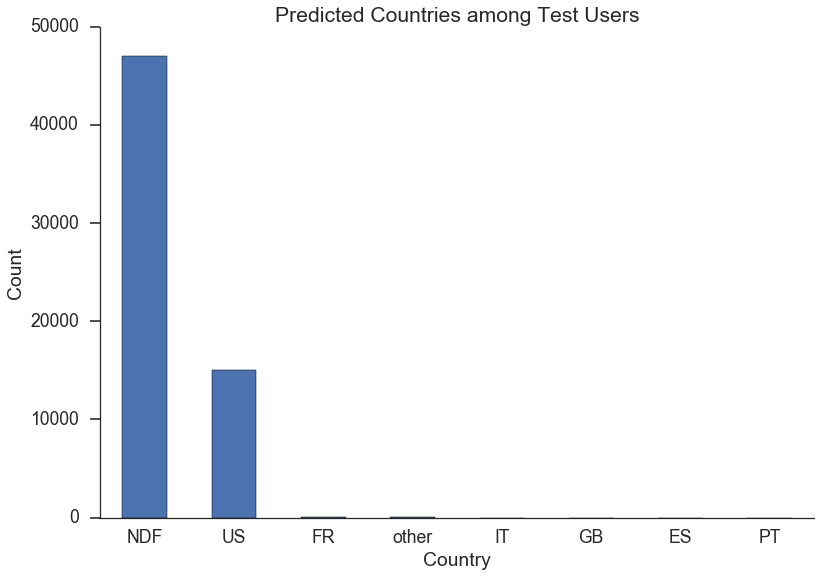

In [87]:
predicted_destinations_number = xgb_final_model_top_pred.country.value_counts()
predicted_destinations_number.plot(kind='bar', rot=0)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Predicted Countries among Test Users')
sns.despine()

for i in xgb_final_model_top_pred.country.unique():
    print "Number of people predicted to book %s is %d" % (i, (xgb_final_model_top_pred['country'] == i).sum())

Around 75% of the airbnb new users were predicted that they won't book in any listing. Almost 25% of US users will book in US itself. The rest of the predictions are low percentages.


**This model for this particular problem is good in terms of NDCG score but by no means the best. A better data exploration might help uncover such relationships and thereby can be used to train a better model.**
 

## End of Airbnb_New_User_Booking_Prediction_Part_2_of_2